# Introduction

## Agenda
- Introduction to time series
- Datetime library in Python
- Wrangle data in Python
- Visualize time series data

### What is / Why Time Series?
- Data drawn from a distribution correlated over time. (You have implictly assumed that data was drawn from an independent distribution.)
- As a data analyst, you WILL encounter time series data. 
- Examples:
    - Economics/Finance: Stock, bond, other asset prices, government policies
    - Science/AI: climate (change) data, speech recognition
    - Business: user behavior data 
    
For example,

In [60]:
from PIL import Image
Image.open("images/sp500.png")

FileNotFoundError: [Errno 2] No such file or directory: 'images/sp500.png'

In a time series, time is often the independent variable and the goal is to make a forecast for the future. From the historical data, we can find some **patterns or trend** which will help us understand the movement and forecast. Some concepts to help you recognize patterns:

For example,

In [ ]:
Image.open("images/pattern.png")

1. The monthly housing sales (top left) show seasonality within each year. 
2. The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.

What do you think about the othe two graphs?
3. The Australian quarterly electricity production (bottom left).
4. The daily change in the Google closing stock price (bottom right).

## Time Series in Python

Python has built in tools for dealing with time data, and we will first familiarize ourselves.

### Data Structure
- Many observations from same individual/sample over time (i.e., $Y_t$ where $t=1,...,T$)
- Detailed time information (e.g., $X_t=$ 2020-09-23 3-PM)

For example,

In [ ]:
import pandas as pd
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)
data.head()

## Datetime in Pandas

- Pandas has a build-in feature to handle the time data with ease
- Built in data structures
    - Time Stamp
    - Time Delta
    - Time Period
- To handle these structures, need numpy package

### Timestamp

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
pd.date_range('2021 Feb 01', periods = 5, freq = 'd')

In [ ]:
pd.Timestamp('2021-02-01')

In [ ]:
pd.Timestamp('02-01-2020 09:00',tz="Europe/London")

### Timedelta
- Can take both positive and negative values

In [ ]:
pd.Timedelta('1 day')

In [ ]:
pd.Timestamp('2021-02-01 18:53') - pd.Timedelta('90 m')

### Timeperiod
- Refer to specific length of time between a start and end time stamp
- Fancier setting allowed such as business days

In [ ]:
pd.Period('2020-09-23')

In [ ]:
pd.Period('2020-09-23')

In [ ]:
pd.period_range('2021-02-01 09:00:00', freq = 'B', periods = 10)

In [ ]:
pd.date_range('2021 Feb 01', freq = 'B', periods = 10)

In [ ]:
temp = pd.Series(range(10), pd.date_range('2020-09-23 09:00', periods = 10, freq = 'H'))
temp

In [ ]:
type(temp)

###  Format
- There exist a pre-existing datetime object: (year, month, day, hour, minute, second, microsecond, and tzinfo).
- The current Gregorian calendar indefinitely extended in both directions.
- Often you will the date will be read in a string form, then reformat with "strptime".

In [ ]:
datetime.fromisoformat('2019-12-04')

In [ ]:
datetime.strptime("01/02/2021", "%d/%m/%Y")

In [ ]:
datetime.strptime("09/11/2018", "%m/%d/%Y")

In [ ]:
datetime.fromisoformat('2019-12-04')

In [ ]:
datetime.fromisoformat('2019-12-04').max

### Time Zone handling

In [ ]:
pd.Timestamp('02/01/2021 00:00',tz='Europe/London')

In [61]:
temp_london = temp.tz_localize(tz = 'Europe/London')
temp_london

2020-09-23 09:00:00+01:00    0
2020-09-23 10:00:00+01:00    1
2020-09-23 11:00:00+01:00    2
2020-09-23 12:00:00+01:00    3
2020-09-23 13:00:00+01:00    4
2020-09-23 14:00:00+01:00    5
2020-09-23 15:00:00+01:00    6
2020-09-23 16:00:00+01:00    7
2020-09-23 17:00:00+01:00    8
2020-09-23 18:00:00+01:00    9
dtype: int64

In [62]:
temp_tokyo = temp_london.tz_convert('Asia/Tokyo')
temp_tokyo

2020-09-23 17:00:00+09:00    0
2020-09-23 18:00:00+09:00    1
2020-09-23 19:00:00+09:00    2
2020-09-23 20:00:00+09:00    3
2020-09-23 21:00:00+09:00    4
2020-09-23 22:00:00+09:00    5
2020-09-23 23:00:00+09:00    6
2020-09-24 00:00:00+09:00    7
2020-09-24 01:00:00+09:00    8
2020-09-24 02:00:00+09:00    9
dtype: int64

### Resampling

In [63]:
temp = pd.date_range('1/1/2011', periods=10, freq='H')
dates = pd.Series(np.random.randn(len(temp)), index=temp)
dates

2011-01-01 00:00:00    0.140692
2011-01-01 01:00:00    0.247264
2011-01-01 02:00:00    1.197636
2011-01-01 03:00:00   -0.059421
2011-01-01 04:00:00    1.235466
2011-01-01 05:00:00   -0.003967
2011-01-01 06:00:00    0.350888
2011-01-01 07:00:00   -0.660633
2011-01-01 08:00:00   -0.179853
2011-01-01 09:00:00   -0.053584
Freq: H, dtype: float64

In [64]:
dates.asfreq('45Min')

2011-01-01 00:00:00    0.140692
2011-01-01 00:45:00         NaN
2011-01-01 01:30:00         NaN
2011-01-01 02:15:00         NaN
2011-01-01 03:00:00   -0.059421
2011-01-01 03:45:00         NaN
2011-01-01 04:30:00         NaN
2011-01-01 05:15:00         NaN
2011-01-01 06:00:00    0.350888
2011-01-01 06:45:00         NaN
2011-01-01 07:30:00         NaN
2011-01-01 08:15:00         NaN
2011-01-01 09:00:00   -0.053584
Freq: 45T, dtype: float64

In [65]:
temp1 = pd.Series(np.random.randn(len(temp)), index=temp)
temp1.asfreq('45Min',method="ffill")

2011-01-01 00:00:00    0.791119
2011-01-01 00:45:00    0.791119
2011-01-01 01:30:00    0.192606
2011-01-01 02:15:00    1.957552
2011-01-01 03:00:00   -0.743377
2011-01-01 03:45:00   -0.743377
2011-01-01 04:30:00    0.577721
2011-01-01 05:15:00   -1.147450
2011-01-01 06:00:00    1.253117
2011-01-01 06:45:00    1.253117
2011-01-01 07:30:00    0.705322
2011-01-01 08:15:00    1.019986
2011-01-01 09:00:00   -0.250607
Freq: 45T, dtype: float64

In [66]:
temp1 = pd.Series(np.random.randn(len(temp)), index=temp)
temp1.asfreq('45Min',method="bfill")

2011-01-01 00:00:00   -0.262343
2011-01-01 00:45:00   -2.189405
2011-01-01 01:30:00    0.508326
2011-01-01 02:15:00    0.993332
2011-01-01 03:00:00    0.993332
2011-01-01 03:45:00   -1.081545
2011-01-01 04:30:00    1.151360
2011-01-01 05:15:00   -0.381282
2011-01-01 06:00:00   -0.381282
2011-01-01 06:45:00    0.499630
2011-01-01 07:30:00    0.339500
2011-01-01 08:15:00   -1.064765
2011-01-01 09:00:00   -1.064765
Freq: 45T, dtype: float64

## Empirical Case: New Year's Resolution


In this session, we're going to check out Google trends data of keywords 'diet', 'gym' and 'finance' to see how they vary over time. Could there be more searches for these terms in January when we're all trying to turn over a new leaf? We're not going to do much mathematics today but we'll source Our data, visualize it and learn about trends and seasonality in time series data. First if all, we will focus on a visual exploration of the dataset in question, and then we will predict its values sometime in the future.

So the question remains: could there be more searches for these terms in January when we're all trying to turn over a new leaf? Let's find out by going [here](https://trends.google.com/trends/explore?date=all&q=diet,gym,finance) and checking out the data (inspired this [this fivethirtyeight piece](https://fivethirtyeight.com/features/how-fast-youll-abandon-your-new-years-resolutions/)).

###  Reading In Data

Let's read in some data:

In [67]:
df = pd.read_csv('../data/multiTimeline.csv', skiprows=1)
df.head(15)

,Month,diet: (United States),gym: (United States),finance: (United States)
0,2004-01,100,22,28
1,2004-02,79,18,29
2,2004-03,69,19,27
3,2004-04,68,15,28
4,2004-05,77,17,27
5,2004-06,67,17,26
6,2004-07,61,19,30
7,2004-08,55,17,29
8,2004-09,53,18,28
9,2004-10,51,17,28


Use the .info() method to check out your data types, number of rows and more:

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     205 non-null    object
 1   diet: (United States)     205 non-null    int64 
 2   gym: (United States)      205 non-null    int64 
 3   finance: (United States)  205 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.5+ KB


In [69]:
df.describe()

,diet: (United States),gym: (United States),finance: (United States)
count,205.000000,205.000000,205.000000
mean,54.312195,26.951220,37.873171
std,9.828934,5.621873,6.371929
min,34.000000,15.000000,25.000000
25%,47.000000,23.000000,34.000000
50%,53.000000,27.000000,37.000000
75%,60.000000,31.000000,41.000000
max,100.000000,49.000000,73.000000


In [70]:
df.columns = ['month', 'diet', 'gym', 'finance']
df

,month,diet,gym,finance
0,2004-01,100,22,28
1,2004-02,79,18,29
2,2004-03,69,19,27
3,2004-04,68,15,28
4,2004-05,77,17,27
...,...,...,...,...
200,2020-09,39,26,43
201,2020-10,41,25,42
202,2020-11,34,26,43
203,2020-12,34,26,45


In [71]:
df['month'] = pd.to_datetime(df['month'])
df

,month,diet,gym,finance
0,2004-01-01,100,22,28
1,2004-02-01,79,18,29
2,2004-03-01,69,19,27
3,2004-04-01,68,15,28
4,2004-05-01,77,17,27
...,...,...,...,...
200,2020-09-01,39,26,43
201,2020-10-01,41,25,42
202,2020-11-01,34,26,43
203,2020-12-01,34,26,45


In [72]:
df['month']

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
200   2020-09-01
201   2020-10-01
202   2020-11-01
203   2020-12-01
204   2021-01-01
Name: month, Length: 205, dtype: datetime64[ns]

In [73]:
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,22,28
2004-02-01,79,18,29
2004-03-01,69,19,27
2004-04-01,68,15,28
2004-05-01,77,17,27


### Graphing

Visualization is a powerful tool for an analyst to recognize any pattern in the data. 

Text(0.5, 0, 'Year')

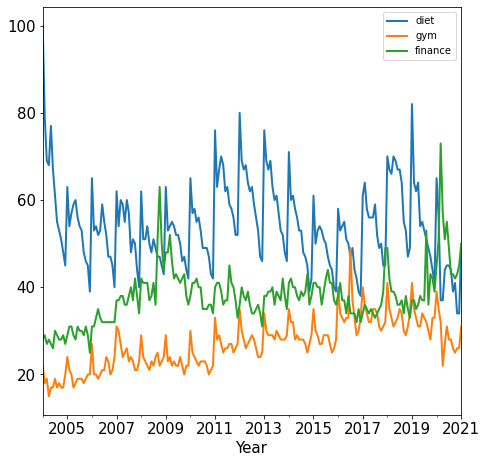

In [74]:
import matplotlib.pyplot as plt
df.plot(figsize=(7.5,7.5), linewidth=2, fontsize=15)
plt.xlabel('Year', fontsize=15)

## Recap:
- You've gotten an overview/introduction to time series.
- You've understood how to use datetime library in Python.
- You've imported your data from google trends.
- You've wrangled your data and gotten it into the form you want to prepare it for analysis.
- You've checked out youe time series visually.

## Up next:

- Identify trends in your time series

## References

The materials presented here are inspired and modified from the following sources:

- https://www.nytimes.com/2020/08/18/business/stock-market-record.html
- https://otexts.com/fpp2/
- https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython
- https://www.cpc.ncep.noaa.gov/products/precip/CWlink/
- https://github.com/CodeOp-tech/tsa-soyhyoj/blob/master/New_Years_Resolutions_Workshop.ipynb